<a href="https://colab.research.google.com/github/raj166/Deep-Learning-Basic-Projects/blob/main/Sequential_API_regression_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

### Data Set Characteristics:

##### Number of Instances:
 	
20640

##### Number of Attributes:
 	
8 numeric, predictive attributes and the target

##### Attribute Information:
 	
* MedInc median income in block
* HouseAge median house age in block
* AveRooms average number of rooms
* AveBedrms average number of bedrooms
* Population block population
* AveOccup average house occupancy
* Latitude house block latitude
* Longitude house block longitude

#### Target

The target variable is the median house value in units of 100,000 for California districts.

#### Documentation 
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#examples-using-sklearn-datasets-fetch-california-housing

In [4]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [17]:
from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [19]:
np.random.seed(42)
tf.random.set_seed(42)

In [20]:
X_train.shape

(11610, 8)

![](Seq_api.png "Title")

In [29]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])
# keras.layers.Dense(30, activation="relu", input_shape=[8])

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 30)                270       
_________________________________________________________________
dense_4 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 31        
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [51]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3), metrics=['mae'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [52]:
model_history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3532 - mae: 0.4217 - val_loss: 0.3416 - val_mae: 0.4151
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3528 - mae: 0.4210 - val_loss: 0.3584 - val_mae: 0.4202
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3522 - mae: 0.4212 - val_loss: 0.3463 - val_mae: 0.4154
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3517 - mae: 0.4205 - val_loss: 0.3395 - val_mae: 0.4164
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3513 - mae: 0.4200 - val_loss: 0.3407 - val_mae: 0.4160
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3506 - mae: 0.4200 - val_loss: 0.3400 - val_mae: 0.4134
Epoch 7/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3503 - mae: 0.4192 - val_loss: 0.3369 - val_mae: 0.4139
Epoch 8/20
363/363 [==============================] - 1s 1ms/step - loss: 0.

In [53]:
mae_test = model.evaluate(X_test, y_test)


162/162 [==============================] - 0s 1ms/step - loss: 0.3460 - mae: 0.4174


In [54]:
model_history.history

{'loss': [0.35320353507995605,
  0.3528378903865814,
  0.35224804282188416,
  0.35165947675704956,
  0.35131633281707764,
  0.3506300449371338,
  0.3503039479255676,
  0.34983932971954346,
  0.3491794764995575,
  0.348660945892334,
  0.3484909236431122,
  0.34796202182769775,
  0.3474534749984741,
  0.3469482362270355,
  0.346650630235672,
  0.3460444509983063,
  0.3457660973072052,
  0.34572526812553406,
  0.34489789605140686,
  0.3446248769760132],
 'mae': [0.42167702317237854,
  0.42104727029800415,
  0.4211863875389099,
  0.4205307364463806,
  0.4200381934642792,
  0.4200248420238495,
  0.4192031919956207,
  0.4191993772983551,
  0.4188746213912964,
  0.4183654189109802,
  0.4179708659648895,
  0.4175880551338196,
  0.41716843843460083,
  0.4167025685310364,
  0.41676533222198486,
  0.416658878326416,
  0.41628745198249817,
  0.41597235202789307,
  0.41532382369041443,
  0.41498860716819763],
 'val_loss': [0.34163057804107666,
  0.358394980430603,
  0.34629198908805847,
  0.3395250

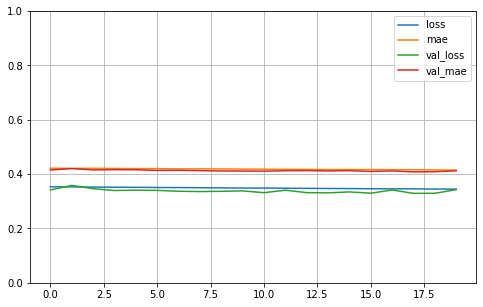

In [55]:
pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)

plt.show()

In [56]:
X_new = X_test[:3]

In [57]:
y_pred = model.predict(X_new)
print (y_pred)
print(y_test[:3])

[[0.6866576]
 [1.82902  ]
 [4.087396 ]]
[0.477   0.458   5.00001]
